### Budget trends in RL data

The following code uses the `all_activity_normal.cs` dataset to create trends lines for average advertising budget for the 2009-2018 period. The dataset can be found at `G:\Market\for Matt & B2B\Data\ReachLocal\Platform Data\all_activities 2009-Nov. 2018.zip` The code can be modified to create these graphs based on a variety of categories, for example business categoty or advertiser subcategory. The logic is fairly straight forward and following the comments along should be easy. The code has been automated to some extend and will be updated in the future to a turn-key code.

*Author: Farshad Nasiri - B2B Data Science Team*

In [1]:
# Import necessay libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from datetime import datetime
#################################################################
## For including LateX interpreter
#################################################################
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

In [2]:
# Read the data
df=pd.read_csv('../data/all_activity_normal.csv')

In [3]:
# Quick look at the shape of the dataframe
#df.shape

In [4]:
# Quick look at the columns
#df.columns

In [5]:
# Summary of missing values
#df.isnull().sum()

In [3]:
# Convert the date columns to date-time format
df['Cycle_Started']=pd.to_datetime(df.Cycle_Started)
df['Cycle_Ended']=pd.to_datetime(df.Cycle_Ended)

In [4]:
# Remove the one row with campaign start date missing
# and reset the index
df=df[~df.Cycle_Started.isnull()]
df.reset_index(drop=True, inplace=True)

In [5]:
# Drop the columns that we won't be using for graph generation 
# in order to reduce memory load

df.drop(columns=['Unnamed: 0', 'Primary_BSC_ID', 'BusinessSpecialtyID', 'Advertiser_URL', 
                 'Country','Currency','BusinessSpecialty', 'CPC', 'CTR', 'CPL', 'CTL', 
                 'Paid_On'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
#temp=df.dropna(axis=0, subset=['BusinessCategory'])

#temp=temp[['BusinessCategory', 'campaign_budget','Cycle_Started','Cycle_Ended']]

#bc=df.BusinessCategory.unique()
#bc[-1]='Other'

In [7]:
def ma(array, window=1):  # Moving average
    return np.convolve(array[0], np.ones((1,window))[0]/window, mode='same').reshape(1,array.shape[1])

In [8]:
from sklearn.linear_model import LinearRegression
mdl=LinearRegression(n_jobs=4)

In [51]:
col='BusinessCategory'

df[col].fillna('Other', inplace=True)

temp=df[[col, 'campaign_budget','Cycle_Started','Cycle_Ended']]

names=df[col].unique()
row_size=len(names)

years=range(2009,2019)
col_names=[]
for year in years:
    for month in range(1,13):
        col_names.append(str(year)+'-M'+str(month))


my_df=pd.DataFrame(data=np.zeros((row_size,12*len(years))), columns=col_names)

my_df.index=sorted(names.tolist())

for month in range(1,13):
    for year in years:
        if month !=12:
            start=pd.to_datetime(str(year)+'-'+str(month)+'-01')
            end = pd.to_datetime(str(year)+'-'+str(month+1)+'-01')
        else:
            start=pd.to_datetime(str(year)+'-'+str(month)+'-01')
            end = pd.to_datetime(str(year)+'-'+str(month)+'-31')

        temp2=temp[(temp.Cycle_Started >= start) & (temp.Cycle_Ended < end)]
        temp2=temp2.groupby(by=[col]).agg({'campaign_budget':'mean'})
       # print(temp2.shape[0])
        temp2.sort_values(by=[col], inplace=True)
        
        my_col=str(year)+'-M'+str(month)
        my_df.loc[temp2.index, my_col]=temp2.campaign_budget
#######################################################################################

#pd.set_option("display.max_columns",100)

#my_df

#from matplotlib import rc
# for i in range(0, len(my_df.index)):
#     location=i

#     plt.figure(figsize=(12,6))
#     plt.cla()
#     plt.plot(my_df.columns, my_df.iloc[location,:],'k-o')
#     plt.xticks(rotation='vertical');
#     plt.tick_params(direction='in', length=10, width=2.5, colors='k',
#                                grid_color='k', grid_alpha=1, labelsize=14)
#     plt.ylabel('Ave. Budget', fontsize=16)
#     plt.title(my_df.index[location], fontsize=16)
#     #ax = plt.gca()
    
#     save_to='../output/BC-2009-2018/'+my_df.index[location].replace(' ', '_').replace('/','')+".png"
#     plt.savefig(save_to, bbox_inches = 'tight')
#     plt.close()


In [52]:
pd.set_option("display.max_columns",100)

my_df

,2009-M1,2009-M2,2009-M3,2009-M4,2009-M5,2009-M6,2009-M7,2009-M8,2009-M9,2009-M10,2009-M11,2009-M12,2010-M1,2010-M2,2010-M3,2010-M4,2010-M5,2010-M6,2010-M7,2010-M8,2010-M9,2010-M10,2010-M11,2010-M12,2011-M1,2011-M2,2011-M3,2011-M4,2011-M5,2011-M6,2011-M7,2011-M8,2011-M9,2011-M10,2011-M11,2011-M12,2012-M1,2012-M2,2012-M3,2012-M4,2012-M5,2012-M6,2012-M7,2012-M8,2012-M9,2012-M10,2012-M11,2012-M12,2013-M1,2013-M2,...,2014-M11,2014-M12,2015-M1,2015-M2,2015-M3,2015-M4,2015-M5,2015-M6,2015-M7,2015-M8,2015-M9,2015-M10,2015-M11,2015-M12,2016-M1,2016-M2,2016-M3,2016-M4,2016-M5,2016-M6,2016-M7,2016-M8,2016-M9,2016-M10,2016-M11,2016-M12,2017-M1,2017-M2,2017-M3,2017-M4,2017-M5,2017-M6,2017-M7,2017-M8,2017-M9,2017-M10,2017-M11,2017-M12,2018-M1,2018-M2,2018-M3,2018-M4,2018-M5,2018-M6,2018-M7,2018-M8,2018-M9,2018-M10,2018-M11,2018-M12
Animals & Pets,398.000000,0.000000,580.000000,713.333333,915.000000,676.666667,671.428571,708.857143,1047.333333,675.250000,477.250000,775.000000,1166.666667,605.000000,1056.363636,737.500000,577.272727,694.444444,835.818182,1120.000000,690.909091,639.500000,733.500000,683.846154,668.750000,950.000000,965.461538,660.916667,787.000000,640.000000,911.230769,906.666667,726.578947,860.526316,697.777778,755.000000,789.555556,638.709677,893.515152,918.391304,867.333333,784.300000,779.444444,889.476190,704.613030,756.303030,486.400000,667.720000,977.484848,1003.304348,...,944.583333,863.608696,736.068182,707.909091,927.870968,915.277778,863.142857,837.366667,830.214286,922.416667,879.894737,942.947368,770.555556,880.539615,659.866667,1020.062500,819.450000,912.500000,936.628333,910.296296,951.588235,1092.052632,812.500000,695.625000,1022.750000,808.571429,951.814815,678.000000,933.850000,707.142857,960.863636,951.111111,1047.523810,883.250000,659.916667,649.100000,964.473684,1077.478261,733.558824,1050.000000,801.945238,914.735625,801.267931,749.925556,595.692381,812.221600,987.577000,900.931667,1200.000000,0.0
Apparel / Fashion & Jewelry,1237.500000,416.666667,398.800000,356.250000,772.916667,443.785714,787.500000,544.333333,799.210526,631.826087,487.500000,535.454545,821.250000,0.000000,516.666667,670.000000,657.142857,935.000000,1270.000000,1050.000000,1009.687500,1662.058824,1088.157895,1588.500000,1074.875000,1666.666667,1372.785714,2075.000000,1167.555556,1602.500000,878.857143,1415.000000,972.685000,1220.833333,1343.055556,956.875000,961.388889,761.818182,1709.636364,2452.125000,1272.777778,1330.562500,2274.714286,1329.615385,1403.125000,1146.875000,2526.190476,1282.068966,1296.162162,1105.625000,...,879.117647,1313.277778,896.111111,1620.833333,1167.666667,1282.000000,984.923077,1087.500000,1492.095238,1043.181818,816.166667,965.588235,1657.166667,1134.807692,877.153846,1035.769231,1146.636364,790.833333,899.583333,1090.625000,950.105263,1196.666667,1121.818182,1175.000000,1692.333333,871.428571,865.000000,1706.444444,956.500000,1006.818182,1563.400000,2123.500000,3298.750000,1216.526316,792.111111,1317.888889,1201.250000,1142.933333,1257.111111,499.666667,1748.466667,1199.875000,1005.500000,937.500000,1558.692308,1269.900000,1428.200000,2097.333333,2887.750000,0.0
Arts & Entertainment,578.333333,0.000000,822.857143,616.666667,1390.377778,897.024286,1202.857143,1534.540000,1476.000000,991.272727,1100.000000,3469.142857,766.666667,0.000000,1275.000000,1040.909091,1088.888889,1150.000000,1311.532308,833.333333,1046.428571,1237.500000,897.500000,1012.500000,1323.000000,809.900000,1052.272727,763.333333,1178.500000,1268.217391,1135.038462,969.826087,1395.235294,1028.610606,1003.125000,1136.911765,1313.608696,1032.777778,1220.535455,1234.444444,1130.000000,922.500000,1077.777778,1306.363636,1108.823529,1080.570750,1083.000000,969.318182,1137.307692,1247.400000,...,1175.117647,1901.312500,1322.217391,1770.000000,1556.207222,1588.000000,1576.153846,1186.363636,1319.222222,926.550000,2965.090909,3013.083333,1595.142857,1713.600000,2016.125000,832.333333,1727.800000,730.363636,942.857143,834.815714,1616.555556,900.00000

In [70]:
#for i in range(0, len(my_df.index)):

threshold = 0.001
ma_window=12

seasonal=[]
period=[]
coefficient=[]
for i in range(0, len(my_df.index)):
    location=i

    time_series=np.array(my_df.iloc[location,:]).reshape(1,-1)
    time_series=time_series-ma(time_series, window=ma_window) # Remove the trend

        # Next largest power of 2        
    nfft=1<<(time_series.shape[1]-1).bit_length()

    y=np.fft.fft(time_series, n=nfft)
    y=abs(y**2)
    y=(y-y.min())
    y=y/y.max()

    freq_ts=(np.linspace(0,nfft/2,int(nfft/2)) *1/float(nfft))
    freq_ts=1/freq_ts
    freq_ts=freq_ts[1:]
    freq_ts=freq_ts.reshape(-1,1)

    y=y[0][1:int(nfft/2)].reshape(1,-1).T

    if time_series.shape == (1,1):
        coeff=0.0
    else:
        mdl.fit(freq_ts, y)
        coeff=mdl.coef_
    
    coefficient.append(coeff[0][0])
    
    if (np.abs(coeff) > threshold):
        seasonal.append(1)
        period.append( (freq_ts[ np.argmax(y) ])[0] )

    else:
        seasonal.append(0)
        period.append(0)

In [71]:
np.array(seasonal)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1])

In [67]:
np.array(period)

#period

array([ 5.04      ,  3.9375    ,  4.06451613,  2.37735849, 12.6       ,
       18.        ,  5.47826087,  2.8       ,  3.        ,  3.07317073,
        8.4       ,  2.03225806,  2.93023256, 11.45454545,  3.        ,
        3.5       , 12.6       , 12.6       ,  3.15      , 11.45454545,
        2.33333333,  9.        ,  6.        , 11.45454545,  2.33333333,
        7.        ,  9.        ,  2.93023256,  2.37735849,  9.        ,
        9.69230769])

In [68]:
np.array(coefficient)

array([  -23182.23737247,  -171174.20736005,  -562000.06936645,
        -163999.10089997,    89296.6341399 ,    11100.38142073,
         -27988.62977589, -7060110.41207263,   -94855.2254572 ,
        -886951.394521  ,  -919123.04345024,  -382056.20867664,
        -122708.0951236 ,  -158613.14908427, -3194861.27559288,
       -4199596.87278732, -3824930.29674413,  -735167.79501398,
       -7342762.77047955,  -750190.05868928,    41733.84389628,
        -179441.97588867,    18891.34759574,    59146.91025642,
          17679.73107307,  -566058.31420968,  -228723.00622045,
         -65113.78914217,  -930175.4688863 , -2213324.33719984,
        -197976.18627683])

Period detected: 2.9302325581395348


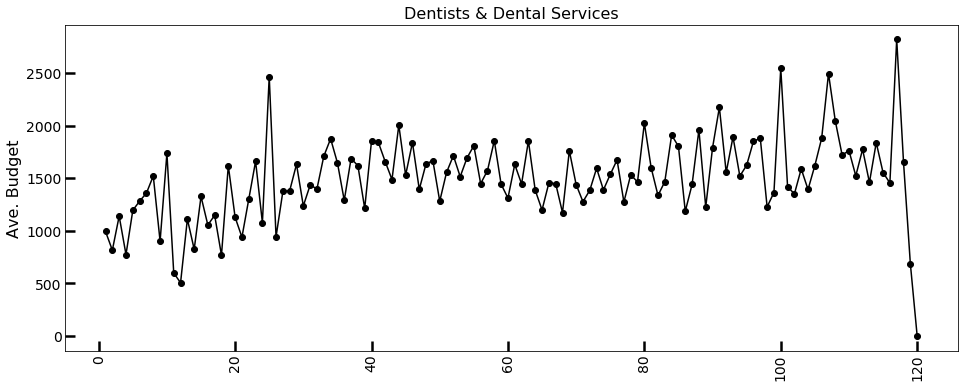

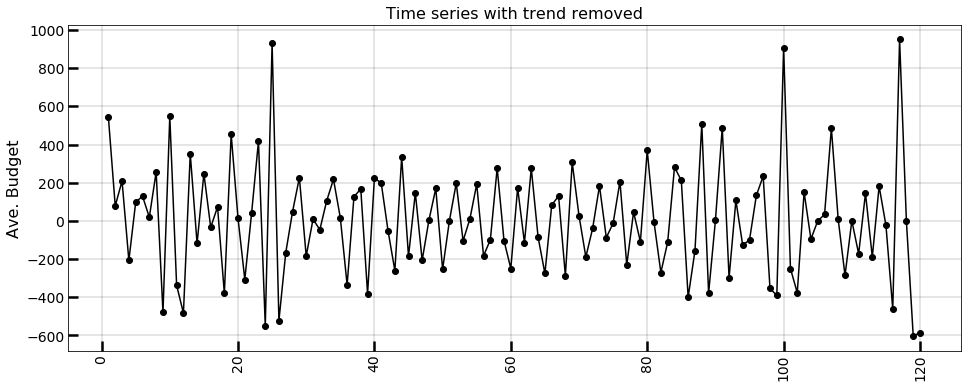

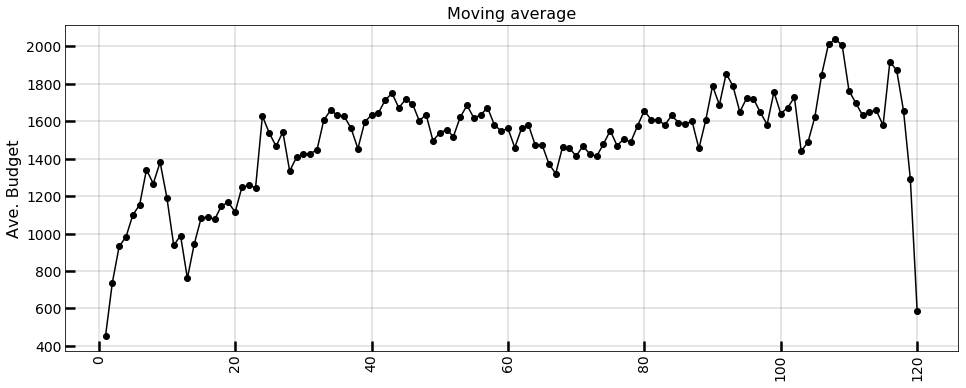

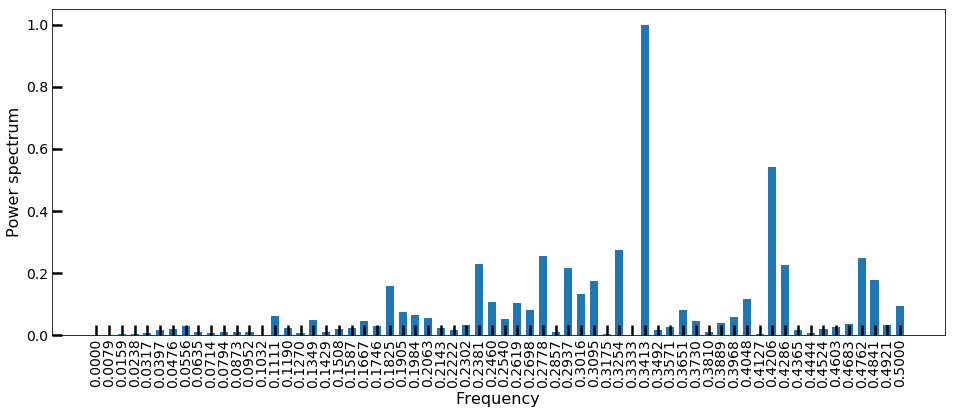

In [108]:
location=12

#print('Seasonality detected:', seasonal[location])
print('Period detected:', period[location])

plt.figure(figsize=(16,6))
plt.cla()
plt.plot(range(1,my_df.columns.shape[0]+1), my_df.iloc[location,:],'k-o')
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title(my_df.index[location], fontsize=16);

time_series=np.array(my_df.iloc[location,:]).reshape(1,-1)
mov_avg=ma(time_series, window=4)
time_series=time_series-ma(time_series, window=4)
nfft=1<<(time_series.shape[1]-1).bit_length()
freq_ts=(np.linspace(0,nfft/2,int(nfft/2)) *1/float(nfft))
freq_ts=freq_ts.reshape(1,-1).T


# Perform FFT
y=np.fft.fft(time_series, n=nfft)
y=abs(y**2) # Get the power spectrum

# Scale (optional)
y=(y-y.min())
y=y/y.max()

# Reshaping because Python is stupid and doesn't take care of this 
# automatically. Boy I miss Matlab.
y=y[0][0:int(nfft/2)].reshape(1,-1).T

plt.figure(figsize=(16,6))
plt.cla()
plt.plot(range(1,my_df.columns.shape[0]+1),time_series[0],'k-o')
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.grid(b=True, linewidth=0.2)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time series with trend removed', fontsize=16)
 

plt.figure(figsize=(16,6))
plt.cla()
plt.plot(range(1,my_df.columns.shape[0]+1),mov_avg[0],'k-o')
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.grid(b=True, linewidth=0.2)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Moving average', fontsize=16)


plt.figure(figsize=(16,6))
plt.cla()
plt.bar(freq_ts.T[0],y.T[0], width=0.005)
plt.xticks(ticks=freq_ts.T[0],rotation='vertical');
#plt.yscale('log')
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.ylabel('Power spectrum', fontsize=16);
plt.xlabel('Frequency', fontsize=16);

In [74]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [105]:
#time_series.shape

In [104]:
#new_series

In [109]:
location= 12
time_series=np.array(my_df.iloc[location,:]).reshape(1,-1)
new_series=diff(time_series[0],k_diff=1, k_seasonal_diff=1, seasonal_periods=3)
test=adfuller(new_series, maxlag=new_series.shape[0]-2)

print(test[1]*100)

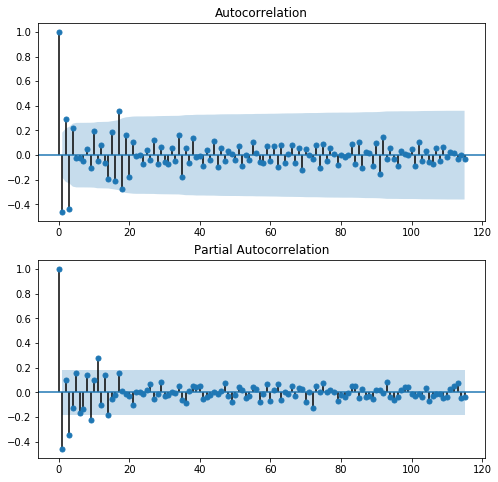

In [111]:
# ACP - PACP
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(x=new_series, ax=ax1);
plot_pacf(x=new_series, ax=ax2, method='ldb');

In [114]:
model=SARIMAX(time_series[0], order=(2, 3, 1), seasonal_order=(3, 1, 1, 5), 
              enforce_invertibility=False, enforce_stationarity=False)
res=model.fit()
pred=res.predict()

steps=1

forecast=res.forecast(steps=steps)

Text(0.5, 1.0, 'Time series with trend removed')

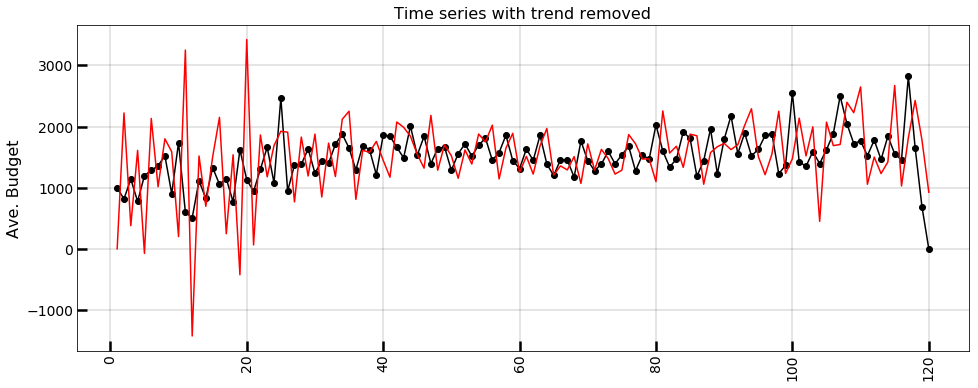

In [115]:
plt.figure(figsize=(16,6))
plt.cla()
plt.plot(range(1,my_df.columns.shape[0]+1),time_series[0],'k-o')
plt.plot(range(1,my_df.columns.shape[0]+1),pred,'r-')
plt.plot(range(my_df.columns.shape[0],my_df.columns.shape[0]+steps),forecast+(pred[-1]-forecast[0]),'r-')
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.grid(b=True, linewidth=0.2)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time series with trend removed', fontsize=16)

In [ ]:
model.p